# Prediction using Decision Tree Classifier

In [1]:
# Importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [3]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

## Load and Examine data

In [4]:
df = pd.read_csv(r"C:\Users\znbra\Downloads\Iris.csv", index_col = "Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


## Basic metadata check
- Shape of dataset
- Information of dataset
- Descriptive statistics of dataset

In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Missing values check

In [9]:
df.isnull().sum().sum()

0

In [10]:
# Extracting species names alone 
df.Species = df.Species.str.split("-").str[1]

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Data Visualization

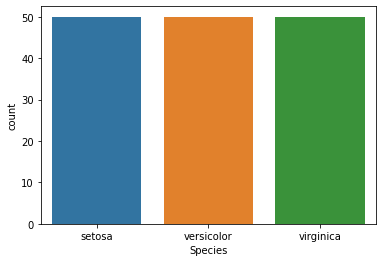

In [12]:
sns.countplot(df.Species)
plt.show()

Setosa, Versicolor and Virginica are equally distributed throughout the dataset. 

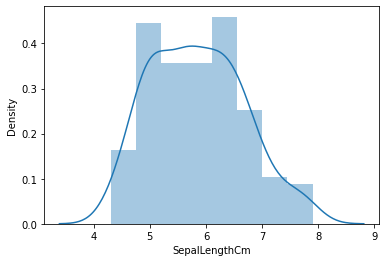

In [13]:
sns.distplot(df.SepalLengthCm)
plt.show()

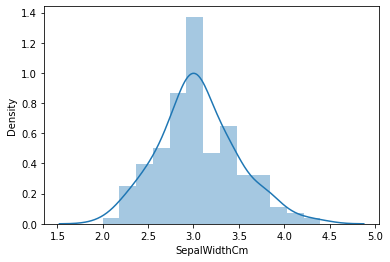

In [14]:
sns.distplot(df.SepalWidthCm)
plt.show()

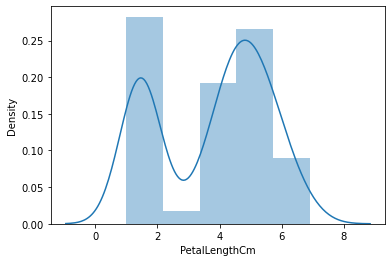

In [15]:
sns.distplot(df.PetalLengthCm)
plt.show()

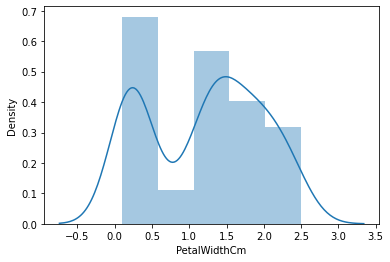

In [16]:
sns.distplot(df.PetalWidthCm)
plt.show()

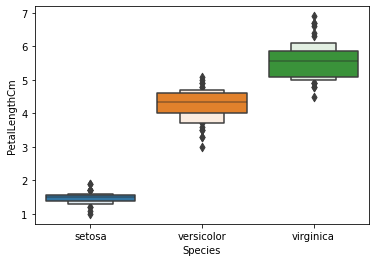

In [17]:
sns.boxenplot(y = df["PetalLengthCm"], x = df["Species"])
plt.show()

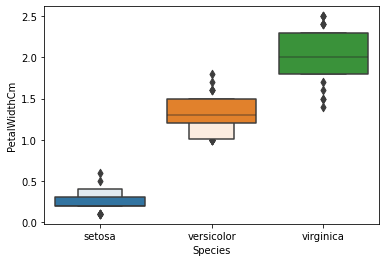

In [18]:
sns.boxenplot(y = df["PetalWidthCm"], x = df["Species"])
plt.show()

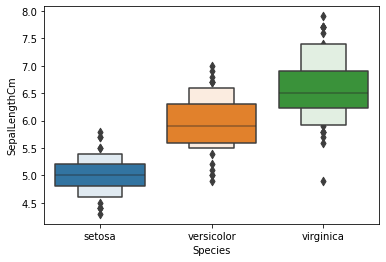

In [19]:
sns.boxenplot(y = df["SepalLengthCm"], x = df["Species"])
plt.show()

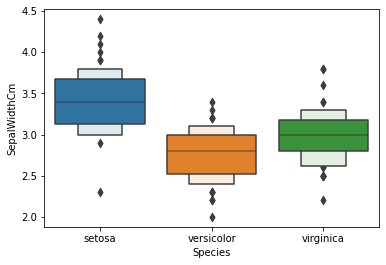

In [20]:
sns.boxenplot(y = df["SepalWidthCm"], x = df["Species"])
plt.show()

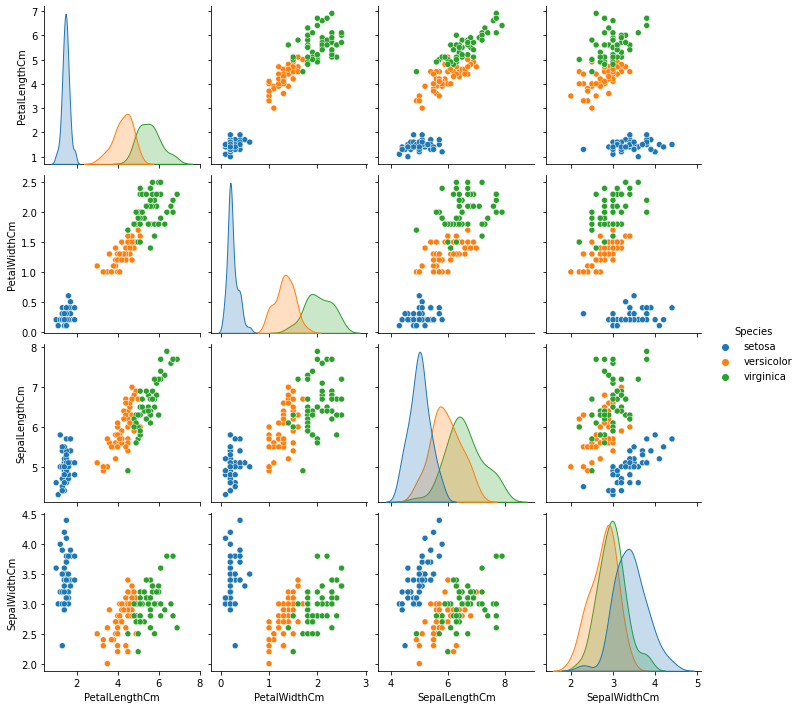

In [21]:
sns.pairplot(data = df, vars = ["PetalLengthCm","PetalWidthCm","SepalLengthCm","SepalWidthCm"],hue = "Species")
plt.show()

In [22]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [24]:
df.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

## Train - Test Split

In [25]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 42)

In [26]:
y_train = df_train.pop("Species")
X_train = df_train
y_test = df_test.pop("Species")
X_test = df_test

In [27]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
82,5.5,2.4,3.7,1.0
134,6.3,2.8,5.1,1.5
138,6.4,3.1,5.5,1.8
76,6.6,3.0,4.4,1.4
110,7.2,3.6,6.1,2.5


## Model Building

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

## Visualizing model 

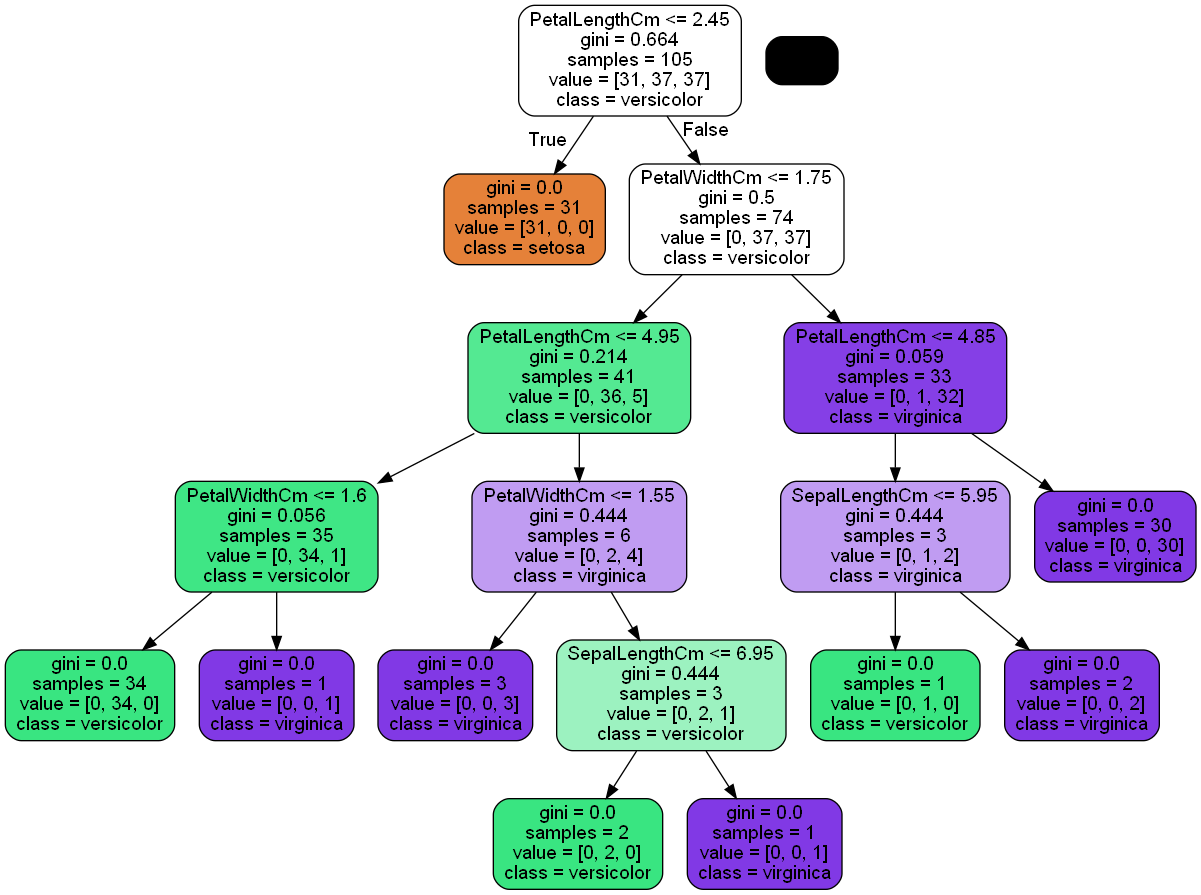

In [29]:
dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, filled = True, rounded = True, feature_names = X_train.columns, class_names = ["setosa","versicolor","virginica"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

### Predicting values from train dataset

In [30]:
y_train_pred = dt.predict(X_train)

In [31]:
metrics.accuracy_score(y_train,y_train_pred)

1.0

### Predicting values from test dataset

In [32]:
y_test_pred = dt.predict(X_test)

In [33]:
metrics.accuracy_score(y_test,y_test_pred)

1.0

### Checking if the classes are correctly predicted.

In [34]:
dt.predict([[3.5, 1.9, 5.2, 2.4]])

array(['virginica'], dtype=object)

In [35]:
dt.predict([[2.6, 2.9, 3.6, 1]])

array(['versicolor'], dtype=object)